This counts the number of words in each speech

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import en_core_web_md
import csv
import regex as re
import os
import spacy
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel
from gensim import corpora
import pprint

In [2]:
# Load up the files
#path = './Data/DataUCSB/' # Smaller UCSB dataset
path = './Data/amrhet/' # larger American Rhetoric dataset
list_of_files = []

for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith('.txt'):
            list_of_files.append(os.path.join(root,file))

filepath = './Data/DataUCSB/address-before-joint-session-the-congress-the-state-the-union-16.csv'
speeches = []
for file in list_of_files:
    with open(file, encoding='utf-8') as f:
        text = f.read()
    f.close()
    speeches.append(text)

#clean out xa0 space characters
[speech.replace(u'\xa0', '') for speech in speeches]; # ; supresses output

In [6]:
lengths = [ len(speech.split()) for speech in speeches]

In [12]:
print(min(lengths))
print(round(np.mean(lengths), 0))
print(max(lengths))
print(round(np.std(lengths), 0))

238
3480.0
18209
2672.0


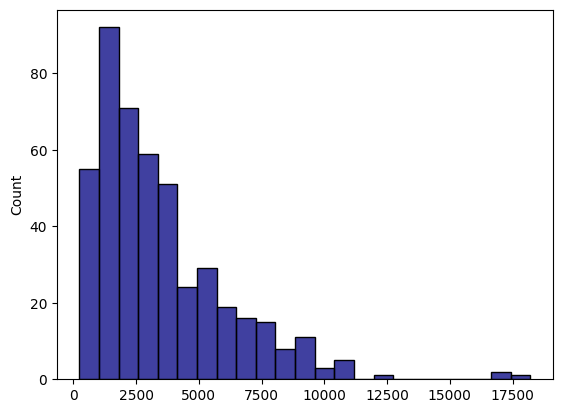

In [40]:
sns.histplot(data = lengths,
             color = 'navy',
             kde = False);

In [29]:
# percent of speeches less than 4096 tokens
lengths = np.asarray(lengths)
len(np.where(lengths<4096)[0])/len(lengths)

0.6926406926406926